<a href="https://colab.research.google.com/github/wadieabbas-bu/refresher-lessons/blob/main/Lesson2_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Working with Numpy**

This notebook introduces the **basic Numpy operations** needed to prepare for Mod 1 and Mod 2. Each section has explanations followed by examples.

Numpy is an incredibly useful tool across a wide range of tasks in applied data science. With a backend written in the C programming language, it offers a clean and efficient python programming interface for indexing data arrays and performing mathematical operations.

In [3]:
# Since we're working in a Colab notebook, the package should be pre-installed.
# In other environments, you'll have to install manually with `pip install numpy`.
import numpy as np
import time

#**1. One-Dimensional arrays**



In lesson 1 we worked with lists in python. Now we can take a list and transform it into a numpy array using `np.array()`. A numpy array is a lot like a list, storing a sequence of values. The advantage of a numpy array, however, it's often more efficient and we can make use of its complete library of useful helper functions (we'll see more on these soon).

## Example 1a.
We can start with a python list and transfrom it to numpy as follows.

In [3]:
python_list = [1,2,3,4,5]
x = np.array(python_list)

# Let's check to make sure this worked by printing the array.
print("Array:", x)

Array: [1 2 3 4 5]


We may also change the datatype of our array by modifying the dtype parameter. By default, numpy will otherwise infer the datatype based upon the objects in our list.

In [4]:
x = np.array([1,2,3,4,5], dtype = float)
print("Array:", x)

Array: [1. 2. 3. 4. 5.]


Notice that all our numbers will now appear with a decimal after them, indicating that they are floating point numbers. Try changing the data type to
`int` and notice how this changes.


Numpy can also handle strings or other pythonic objects, in which case we can
use `dtype = object`. Note, however, that numpy is mainly
designed for numerical data, and most of the functions we will use later will only be applicable to `int` or `float` datatypes.

In [5]:
x = np.array(["a", "b", "c", "d", "e"], dtype = object)
print("Array:", x)

Array: ['a' 'b' 'c' 'd' 'e']


## Example 1b.
We also have a few options for creating new arrays which don't start from a list. These are often useful for cases where we need our array pre-populated with a specific value, or otherwise want our array to follow a certain pattern. For example, we could create an size 10 array with all zeros.

In [6]:
# The `shape` parameter indicates the size of resulting array.
# This also works simply as np.zeros(10). Note that numpy will automatically
# default to using the floating point type, unless we tell it otherwise.
x = np.zeros(shape = 10)
print("Array:", x)

Array: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


**Excercise 1.1** Change the datatype of the zeros array to integers. Tip: check out the [astype](https://numpy.org/devdocs/reference/generated/numpy.ndarray.astype.html) method.

In [8]:
# Your code here:
x.astype(dtype= int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

We can also do the same but with `ones` method instead.

In [9]:
x = np.ones(shape = 10)
print("Array:", x)

Array: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


We can also specify a value to fill our array with.
Here, if a datatype is not explicity given, it will be inferred by our fill value.

In [10]:
x = np.full(shape = 10, fill_value = 5)
print("Array:", x)

Array: [5 5 5 5 5 5 5 5 5 5]


**Excercise 1.2** Modify the `fill_value` and the `dtype` parameter with `np.full`. What happens if the fill value is an floating point number and we tell numpy to use an integer data type? Or vice versa? Which takes precedence?

In [21]:
# Your code here:
y = np.full(shape = 10, dtype=float, fill_value=5)
y

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

Numpy also has a function for allocating empty arrays, which we might not want to populate with values yet. Consider the following example with a size 10 emtpy array.

In [24]:
z = np.empty(shape = 10)
print("Array:", z)

Array: [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


But what happened? When we print the array it doesn't look empty?

In fact, you'll likely see either arbitrary values or perhaps values from previous variables or arrays (e.g. the all ones array we created two code cells earlier) that are no longer being used by python. Unlike the other functions, this one does not initialize any new space in your computer's memory, and instead creates pointers to places where it plans to initialize.

## Example 1c.
We can also create sequences of numbers, just like we would with python's built in `range()` function.

In [28]:
x = np.arange(start = 0, stop = 10)
print("Array:", x)

Array: [0 1 2 3 4 5 6 7 8 9]


One nice new feature, is that we can do something similar with floating points. Here we create an array of floating point numbers from 0-1. This also works as np.linspace(0,1,11), but we include the full parameterization for completeness.

In [35]:
# This also works as np.linspace(0,1,11),
# but we include the full parameterization for completeness.
x = np.linspace(start = 0, stop = 1, num = 11)
print("Array:", x)

Array: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


**Excercise 1.3** Create a sequence of floating point numbers from 0 to 1, with intervals of 0.05. For example, your array should start as `[0, 0.05, 0.10, 0.15, ...]`.

In [36]:
# Your code here:
np.linspace(start = 0, stop = 1, num = 21)


array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

Numpy also offers options for pre-populating arrays with random numbers. For example, we can use the uniform distribution so that every number is randomly chosen from the set of all numbers between 0 and 1.

In [39]:
x = np.random.uniform(low = 0, high = 1, size = 10)
print("Array:", x)

Array: [0.19702645 0.00221915 0.85916457 0.20899792 0.40213403 0.35801564
 0.41119293 0.0843298  0.05082019 0.1545548 ]


## Example 1d.
Once we have a numpy array we can start to make use of its indexing capabilities. For a 1-dimensional array, this looks identical to indexing a python list.

In [40]:
# Start by creating a large array of floats starting from 0 and ending at 1.
x = np.linspace(start = 0, stop = 1, num = 101)

# We can access a single element:
a = x[52]
print('Single element:', str(a))

# Or a subsequence:
z = x[30:40]
print('Subsequence:', z)

Single element: 0.52
Subsequence: [0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39]


**Exercise 1.4** Create a numpy array of numbers 1 through 100. Next, slice it to create an array containing only numbers 25-75.

In [56]:
# Your code here:
x = np.arange(start=1, stop=101)
y = x[24:75]
y


array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75])

## Example 1e.
You might be wondering if numpy offers any way to append items to the end of an existing array. While it does indeed provide a `append()` function, it won't work exactly like it does in python. The key difference is that python will modify your list in-place, whereas numpy will create a copy of your list with the new items added on. Let's try this out to see.

In [57]:
# We can do this with a single new number
x = np.array([1,2,3,4])
y = np.append(x, 5)
print('x:', x)
print('y:', y)

print()
# Or a list/array of numbers.
x = np.array([1,2,3,4])
y = np.append(x, [5,6])
print('x:', x)
print('y:', y)

x: [1 2 3 4]
y: [1 2 3 4 5]

x: [1 2 3 4]
y: [1 2 3 4 5 6]


Notice how the `x` array itself did not change, and instead we stored the result in a new variable, `y`.

Sometimes it is useful to take multiple numpy arrays and stick each on to the end of the other. Here we'll take three numpy arrays and use the `concatenate` method to piece them together.

In [58]:
x = np.array([1,2,3])
y = np.array([4,5,6])
z = np.array([7,8,9])

w = np.concatenate([x,y,z])
print('w:', w)

w: [1 2 3 4 5 6 7 8 9]


**Excercise 1.5** Create three arrays `x,y,z` with integers 1-33, 34-66, and 67-100 respectively, and concatenate them together to produce an array of numbers from 1-100.

In [63]:
# Your code here:
x = np.arange(start=1, stop=34)
y = np.arange(start=34, stop=68)
z = np.arange(start=68, stop=101)
w = np.concatenate([x,y,z])
w

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

#**2. Two-Dimensional arrays**

Numpy's strengths become more apparent once we move beyond 1-dimensional arrays. Unlike python lists, its efficient indexing operations carry over to 2-dimensional arrays (matrices).  

## Example 2a.
We can create a 2-dimensional array using many of the same procedures as we used for 1-dimensional arrays.

In [ ]:
# From a python list:
X = np.array([
    [1,2,3,4],
    [5,6,7,8]
])
print('Array: \n', X)

In [68]:
# As an empty array of zeros. Here, the shape parameter takes a tuple
# with values (number of rows, number of columns).
X = np.zeros(shape = (3,5), dtype=int)
print('Array: \n', X, '\n')

Array: 
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]] 



In [69]:
# As an empty array of zeros. Here, the shape parameter takes a tuple
# with values (number of rows, number of columns).
X = np.ones(shape = (6,2))
print('Array: \n', X, '\n')

Array: 
 [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]] 



**Exercise 2.1** Use numpy's `full()` method to create a 2-dimensional array with shape (7,3) and filled with the integer 5.

In [65]:
# Your code here:
x = np.full(shape=(7,3), fill_value=5)
x

array([[5, 5, 5],
       [5, 5, 5],
       [5, 5, 5],
       [5, 5, 5],
       [5, 5, 5],
       [5, 5, 5],
       [5, 5, 5]])

### Example 2b.
Alternatively we can take a 1 dimensional array and use numpy's `reshape()` method with parameters for parameters `(n_rows, n_columns)` to transform it it.

In [76]:
X = np.arange(start = 1, stop = 13).reshape(3,4)
print('Array: \n', X, '\n')

Array: 
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 



**Exercise 2.1** Note that if
the length of your 1d array does not equal n_rows * n_columns, numpy will throw an error. Try it out by changing n_columns to 5.

**Exercise 2.2** Create an 2 dimensional array with floats `[0.1, 0.2, ..., 0.9, 1]` split into 2 rows and 5 columns.

In [83]:
# Your code here:
x = np.linspace(start=.1, stop=1, num=10)
x.reshape(2,5)

array([[0.1, 0.2, 0.3, 0.4, 0.5],
       [0.6, 0.7, 0.8, 0.9, 1. ]])

### Example 2c.

Now we can practice indexing, which is done simultaneously over rows and columns. This is unlike python, for which we would often have to write a loop to acheive similar functionality. For a two dimensional array `X`, we index simultaneously as follows: `X[row indices, column indices]`

In [84]:
# Let's start by making an array with values 1-100
X = np.arange(start = 1, stop = 101).reshape(10,10)
print('X = ', X, '\n')

X =  [[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]] 



In [85]:
# We can access an individual row by selecting it's row number and
# keeping all columns.
x1 = X[3,:]
print('Row at index 3: \n', x1, '\n')

Row at index 3: 
 [31 32 33 34 35 36 37 38 39 40] 



In [89]:
# We can access an individual column by selecting it's column number and
# keeping all rows.
x2 = X[:,3]
print('Column at index 3: \n', x2, '\n')

Column at index 3: 
 [ 4 14 24 34 44 54 64 74 84 94] 



In [90]:
# We can access a subset of rows by selecting their row numbers and
# keeping all columns.
x3 = X[3:5,:]
print('Row subarray: \n', x3, '\n')

Row subarray: 
 [[31 32 33 34 35 36 37 38 39 40]
 [41 42 43 44 45 46 47 48 49 50]] 



In [91]:
# We can access a subset of columns by selecting their column numbers and
# keeping all rows.
x4 = X[:,3:5]
print('Column subarray: \n', x4, '\n')

Column subarray: 
 [[ 4  5]
 [14 15]
 [24 25]
 [34 35]
 [44 45]
 [54 55]
 [64 65]
 [74 75]
 [84 85]
 [94 95]] 



In [92]:
# We can also create a submatrix by performing these actions simultaneously,
# taking columns 3-5 of the submatrix with rows 3-5.
x5 = X[3:7,3:5]
print('Subarray: \n', x5, '\n')

Subarray: 
 [[34 35]
 [44 45]
 [54 55]
 [64 65]] 



In [93]:
# Finally, we may also select which rows or columns we want by indexing with
# a list of items:
x6 = X[[0,2,4], 7:]
print('Subarray: \n', x6, '\n')

Subarray: 
 [[ 8  9 10]
 [28 29 30]
 [48 49 50]] 



**Exercise 2.3** Using indexing on `X`, create a subarray where the first row has numbers `[1,3,9,10]` and the second row has numbers `[21, 23, 29, 30]`. Hint: do this in two steps or use numpy's [ix](https://numpy.org/devdocs/reference/generated/numpy.ix_.html) function.

In [113]:
# Your code here
x7 = X[[0,2],:]
x8 = x7[:,[0,2,8,9]]
print(x8)

y1 = X[np.ix_([0,2], [0,2,8,9])]
print(y1)

[[ 1  3  9 10]
 [21 23 29 30]]
[[ 1  3  9 10]
 [21 23 29 30]]


#**3. Functions on Numpy Arrays**

Another reason we might want to use Numpy arrays is to take advantage of their efficient array functions, as well as the ability to design our own.

## Example 3a.
Let's first consider a scenario where we want to sum all of the elements in a 1 dimensional array. We will implement a few different ways to do this with both numpy and regular python lists, and then time them for comparison.

In [3]:
# We'll create an array and a list for comparison,
# both with numbers 1-1000
start = 1
end = 100000001
x_list = list(range(start, end))
x_array = np.arange(start = start, stop = end)

# We could sum the numbers in our list manually using a for loop:
start = time.time()
sum_list = 0
for x in x_list:
  sum_list += x
end = time.time()
print("Time to sum a list with loop: ", end - start)

# We could also take advantage of python's built-in sum() function
start = time.time()
sum_list = sum(x_list)
end = time.time()
print("Time to sum a list with built-in: ", end - start)

# For a numpy array, we can call the built-in sum function:
start = time.time()
sum_array = np.sum(x_array)
end = time.time()
print("Time to sum a numpy array: ", end - start)


Time to sum a list with loop:  12.752726316452026
Time to sum a list with built-in:  0.9631824493408203
Time to sum a numpy array:  0.07154273986816406


**Exercise 3.1** You may not notice much of a difference with a relatively small sequence of numbers, but try setting `end = 10000001`, for example, to notice a considerable difference in the run time of each method. One of numpy's core strengths is a backend written in C, which allows for much faster computation in functions that work as a loop over a sequence of numbers. When working with big datasets, small improvements to runtime can make a great difference.

You may also want to sum entries in a 2-dimensional array. We can choose to sum all the entries, or use numpy's `axis` parameter to choose to sum only along the rows or columns of your array.  

In [117]:
# Let's start by making an array with values 1-100
X = np.arange(start = 1, stop = 101).reshape(10,10)
print('X = ', X, '\n')

X =  [[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]] 



In [118]:
# Sum all the entries:
print(np.sum(X))

5050


In [124]:
# Sum the numbers in each row. Here the output will be an array with a sum for
# each of our rows.
print(np.sum(X, axis = 1))

[ 55 155 255 355 455 555 655 755 855 955]


In [122]:
# Sum the numbers in each column. Here the output will be an array with a sum for
# each of our columns.
print(np.sum(X, axis = 0))

[460 470 480 490 500 510 520 530 540 550]


## Example 3b.
In previous lessons you wrote code to find the mean and standard deviation of a list of numbers. Using those functions here, let's make a similar comparison to numpy's built in `mean()` and `std()` functions.

**Exercise 3.2** Using the template below, create your own numpy array, and manual functions for computing the mean and standard deviation. Then run the cell to see a time comparison. As in the previous exercise, try changing the size of your array to see a difference in compute time.

In [4]:
your_list = list(range(1,100_001)) # Create your own list of numbers
your_array = np.array(your_list) # Convert that list to a numpy array

# Compute the mean of the list:
def mean(x):
  return sum(x) / len(x)

def std(x):
  # Fill in with your code
  m = mean(x)
  x_ = [(i-m)**2 for i in x]
  return mean(x_) ** 0.5

start = time.time()
print("Mean of list: ", mean(your_list))
end = time.time()
print("Time to compute mean manually: ", end - start)

start = time.time()
print("Mean of array: ", np.mean(your_array))
end = time.time()
print("Time to compute mean with numpy: ", end - start)

start = time.time()
print("Standard deviation of list: ", std(your_list))
end = time.time()
print("Time to compute std manually: ", end - start)

start = time.time()
print("Standard deviation of array: ", np.std(your_array))
end = time.time()
print("Time to compute std with numpy: ", end - start)

Mean of list:  50000.5
Time to compute mean manually:  0.0011591911315917969
Mean of array:  50000.5
Time to compute mean with numpy:  0.0007071495056152344
Standard deviation of list:  28867.513458037913
Time to compute std manually:  0.01664423942565918
Standard deviation of array:  28867.513458037913
Time to compute std with numpy:  0.0008966922760009766


**Exercise 3.3** Using the following two dimensional array and numpy's `mean(..., axis = ...)` method, calculate the mean of (a) the entire array, (b) each row, (c) each column. Hint: The axis parameter works just like it did for the `sum()` method in 3a.

In [15]:
X = np.arange(start = 1, stop = 101).reshape(10,10)

# Your code here
a = np.mean(X)
b = np.mean(X, axis=1)
c = np.mean(X, axis=0)
print(a)

50.5


## Example 3c.
Another useful feature Numpy offers, is the ability to efficiently compute and customize functions on multiple arrays. For example, we might have two arrays that we wish to sum, multiply, or divide element-wise. Numpy offers pre-built functions that we can easily call or use familiar python expression for. As we'll see however, it also offers us the ability to create our own.

In [5]:
# Let's start with two simple 1d numpy arrays
# (Excercise: Try this with 2d arrays as well)
x = np.array([1,3,5,9])
y = np.array([2,4,6,8])

# We can call numpy's built in add function
z1 = np.add(x,y)
print('z1: ', z1)

# Or even just use a pythonic expression to get the same result
z2 = x + y
print('z2: ', z2)

z1:  [ 3  7 11 17]
z2:  [ 3  7 11 17]


Alternatively we can create our own elementwise function by using numpy's
universal function options. In the example below, the `my_add()` function takes two numbers i and j, and simply adds them together. Numpy's `fumpyfunc()` method then takes this function and applies it across pairs of corresponding items from two given arrays.

Note: The `frompyfunc()` function typically takes three arguments
* `func`, the function to be applied across arrays
* `nin`, the number of inputs the `func` takes.
* `nout`, the number of outputs `func` returns.

Once the function is initialized, we can call it on a given set of arrays. The number of arrays we apply it to should also correspond to the `nin` parameter. Check out the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.frompyfunc.html) for more info!

In [6]:
def my_add(i,j):
  return i + j

# Now we take that operation and broadcast it to a setting which takes two
# input arrays and produces 1 output array.
add_func = np.frompyfunc(my_add, nin = 2, nout = 1)
z3 = add_func(x,y)
print('z3: ', z3)

# NOTE, however, that this will be slower than numpy's built in options,
# since it won't be computed with the C backend. Likewise, the resulting datatype
# will be 'object' since numpy can't infer the datatype from the
# output of a python function.

z3:  [3 7 11 17]


NOTE, however, that this will be slower than numpy's built in options,
since it won't be computed with the C backend. Likewise, the resulting datatype
will be 'object' since numpy can't infer the datatype from the
output of a python function.

**Exercise 3.4** Using the following templates, recreate the previous examples,
but for the (a) multiplication and (b) division operations. For the multiplication exercise, try to create a function that multiplies three arrays simultaneously.

In [14]:
# (a) Multiplication:
z1 = np.multiply(x,y)
print('z1: ', z1)

# Try using a pythonic expression to get the same result
z2 = x * y
print('z2: ', z2)

# And create a custom function to use with numpy's universal function option.
def my_mult(i,j):
  return i * j

mult_func = np.frompyfunc(my_mult, nin=2, nout=1)
z3 = mult_func(x,y)
print('z3: ', z3)

z1:  [ 2 12 30 72]
z2:  [ 2 12 30 72]
z3:  [2 12 30 72]


In [20]:
# (b) Division:
z1 = np.divide(x,y)
print('z1: ', z1)

# Try using a pythonic expression to get the same result
z2 = x / y
print('z2: ', z2)

# And create a custom function to use with numpy's universal function option.
# This could be useful if we want to handle division by zero errors!
def my_div(x,y):
  if y == 0:
    return np.nan
  return x / y

div_func = np.frompyfunc(my_div, nin=2, nout=1)
z3 = div_func(x,y)
print('z3: ', z3)

z1:  [0.5        0.75       0.83333333 1.125     ]
z2:  [0.5        0.75       0.83333333 1.125     ]
z3:  [0.5 0.75 0.8333333333333334 1.125]


## Example 3d.
Finally, as data scientists, linear algebra is our bread and butter. Luckily numpy offers a full suite of linear algebra tools for us to work with. Here, we'll compute the dot product of two vectors $x$ and $y$. Recall that the dot product of two length $n$ vectors may be expressed as follows.

$$x \cdot y = \sum_{i = 1}^n x_i * y_i$$

If you're curious, check out the full linear algebra suite [here](https://numpy.org/doc/stable/reference/routines.linalg.html).

**Exercise 3.5** Write your own manual dot product function and compare it with the
result from numpy's `dot()` method.

In [25]:
# Let's start with simple 1d arrays again
x = np.array([1,3,5,9])
y = np.array([2,4,6,8])

# Write your own manual function for computing the dot product:
def dot_product(x,y):
  sumx = 0
  if len(x) != len(y):
    return 'undefined'
  for i,x in enumerate(x):
    sumx += (x * y[i])
  return sumx

print("My dot product: " + str(dot_product(x,y)))

# Now let's try using numpy's built in function:
print("Numpy dot product: " + str(np.dot(x,y)))

# Again, if you time this, you will notice boost in speed from numpy!

My dot product: 116
Numpy dot product: 116


# **4. Application: Row Operations**

In linear algebra you will often make use of row operations, which modify the rows of some given matrix. In the following exercise you are given a 2d array $X$ representing a matrix, and are given guidance to perform the following tasks:
1. Swap (or interchange) the order of the rows. Consider the following example where the first row is exchanged for the third:

$$
\begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix} \rightarrow
\begin{bmatrix}
5 & 6 \\
3 & 4 \\
1 & 2
\end{bmatrix}
$$

2. Multiply a row by a scalar value. Consider the following example where the second row is multiplied by 10.
$$
\begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix} \rightarrow
\begin{bmatrix}
1 & 2 \\
30 & 40 \\
5 & 6
\end{bmatrix}
$$
3. Add some multiple of one row to another. Consider the following example where the first row is multiplied by 3 and then added to the third row.
$$
\begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix} \rightarrow
\begin{bmatrix}
1 & 2 \\
3 & 4 \\
8 & 12
\end{bmatrix}
$$


In [26]:
# We'll work with the following 2d array.
X = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

**Exercise 4.1** Swap row 0 with row 2.

In [30]:
# Hint: Numpy allows re-ordering of a 1d array by passing
# the desired ordering as a list when indexing:
x = np.array([1,2,3,4])
print('1d reordered:', x[[3,1,2,0]])

# Try to recreate this for a 2d array, but remember not to change the columns!
X_swap = X[[2,0,1]]
print('Swapped rows: \n', X_swap)

1d reordered: [4 2 3 1]
Swapped rows: 
 [[7 8 9]
 [1 2 3]
 [4 5 6]]


**Exercise 4.2** Multiply row 1 by 5.

In [35]:
# Hint: Numpy allows us to modify a row by accessing it like a variable.
# Let's see how this works. We'll create a copy of X since this will change the matrix.
Y = np.copy(X)
Y[1,:] = np.array([10,20,30])
print('Modified row: \n', Y)

# Recall that for an array x, using x * 5 will perform elementwise multiplication.
# Use this with row accessing to multiply row 1 by 5.

# Perform row operations on Y here!
Y = np.copy(X)
Y[1] = Y[1] * 5
print('Multiplied row: \n', Y)

Modified row: 
 [[ 1  2  3]
 [10 20 30]
 [ 7  8  9]]
Multiplied row: 
 [[ 1  2  3]
 [20 25 30]
 [ 7  8  9]]


**Exercise 4.3** Add 3 times row 0 to row 2.

In [39]:
# Use what you learned in parts a. and b. to perform this operation.
# We'll create another copy to work with.
Y = np.copy(X)
Y[2] = Y[2] + 3 * Y[0]
# Perform row operations here!

print('Added row: \n', Y)

Added row: 
 [[ 1  2  3]
 [ 4  5  6]
 [10 14 18]]


#**5. Application: Distance Functions**

Often when working with two arrays, we might be interested in the distance between them. Two popular notions of distance are the following. For both, numpy offers quick and efficient methods for computation.

- **L1 distance (Manhattan distance):** For two vectors $x$ and $y$, measures the sum of absolute differences between each pair of array elements $x_i, y_i$. It is nicknamed the Manhattan distance since it's a lot like moving between two places when there are building in between. It is calculated as:

$$ d_1(x,y) = \sum_{i=1}^{n} |x_i - y_i| $$


- **L2 distance (Euclidean distance):** For two vectors $x$ and $y$, measures the squared differences between between each pair of array elements $x_i, y_i$. It is computed as:

$$ d_2(x,y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $$


**Exercise 5.1** Implement the L1 and L2 distance functions by using
some of numpy's built in functions.

In [42]:
# Let's create two simple 1d arrays
x = np.array([3, -0.5, 2, 7])
y = np.array([2.5, 0.0, 2, 8])

# Now implement both the L1 and L2 losses by using numpy's built in functions.
# Hint: np.abs(x) computes the elementwise absolute values for an array x.
# Likewise, x**2 squares each entry of an array x. Try combining these operations
# with the np.sum() function we used before.
l1 = np.sum(np.abs(x - y))
l2 = np.sqrt(np.sum((x - y)**2))
print("L1 Distance:", l1)
print("L2 Distance:", l2)

L1 Distance: 2.0
L2 Distance: 1.224744871391589


#**6. Application: Images and $n$-Dimensional Arrays**

Lucky for us, numpy doesn't just stop at 2-dimensional arrays. In fact, its library offers full support for $n$-dimensions. Usually when working with data, however, we'll stick to two or three. One common setting in which you'll encounter 3-dimensional arrays is when working with images. Images are by themselves a two dimensional array of pixels. Each pixel, however, also stores its own information, meaning we need another dimension to store everything. Specifically, each pixel is made up of 3 values specifying its intensity in the Red, Green, and Blue (RGB) color scales.

In [63]:
import skimage as ski
cat = ski.data.chelsea()

array([[[143, 120, 104],
        [143, 120, 104],
        [141, 118, 102],
        ...,
        [ 45,  27,  13],
        [ 45,  27,  13],
        [ 45,  27,  13]],

       [[146, 123, 107],
        [145, 122, 106],
        [143, 120, 104],
        ...,
        [ 46,  29,  13],
        [ 45,  29,  13],
        [ 47,  30,  14]],

       [[148, 126, 112],
        [147, 125, 111],
        [146, 122, 109],
        ...,
        [ 48,  28,  17],
        [ 49,  29,  18],
        [ 50,  30,  19]],

       ...,

       [[ 92,  58,  30],
        [105,  71,  43],
        [132,  98,  71],
        ...,
        [172, 145, 138],
        [172, 145, 138],
        [172, 145, 138]],

       [[128,  92,  60],
        [139, 103,  71],
        [134,  95,  64],
        ...,
        [166, 142, 132],
        [166, 142, 132],
        [167, 143, 133]],

       [[139, 103,  71],
        [127,  88,  57],
        [125,  86,  53],
        ...,
        [161, 137, 127],
        [161, 137, 127],
        [162, 138, 128]]], dtype=uint8)
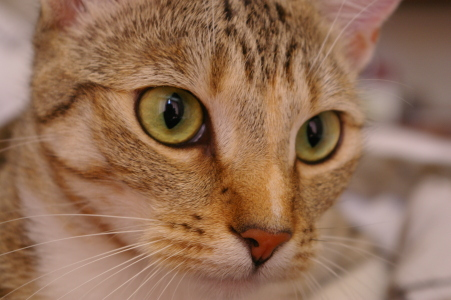

In [64]:
# Click show data to see what the actual numpy array looks like:
cat

**Excercise 6.1** Use your array indexing skills to find the subset of data which only includes the cat's left eye. Hint: extend to three dimensions by using three comma separated arguments e.g. `X[1:10, 100:200, 0:2]`.

array([[[182, 142, 116],
        [179, 139, 113],
        [158, 121,  94],
        ...,
        [144, 109,  81],
        [166, 129, 103],
        [172, 135, 109]],

       [[172, 136, 110],
        [180, 144, 118],
        [179, 145, 118],
        ...,
        [143, 106,  79],
        [166, 126, 101],
        [179, 139, 114]],

       [[192, 156, 130],
        [189, 153, 127],
        [189, 155, 128],
        ...,
        [143, 106,  79],
        [160, 120,  95],
        [180, 140, 115]],

       ...,

       [[152, 106,  57],
        [155, 108,  62],
        [164, 122,  74],
        ...,
        [ 87,  40,  20],
        [ 90,  43,  23],
        [ 89,  40,  23]],

       [[150, 101,  58],
        [154, 103,  60],
        [160, 112,  64],
        ...,
        [110,  59,  30],
        [107,  53,  27],
        [101,  49,  25]],

       [[141,  95,  59],
        [139,  94,  55],
        [143, 100,  57],
        ...,
        [132,  79,  47],
        [114,  61,  29],
        [116,  60,  33]]], dtype=uint8)
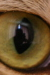

In [72]:
# Your code here
cat[75:150, 125:225, :]

**Excercise 6.2** Now that you've indexed only the eye, modify the original image by multiplying *only* the values in that subset by 5. Hint: use `*=` to multiply in place, and simply call `cat` to see the original image again.

array([[[143, 120, 104],
        [143, 120, 104],
        [141, 118, 102],
        ...,
        [ 45,  27,  13],
        [ 45,  27,  13],
        [ 45,  27,  13]],

       [[146, 123, 107],
        [145, 122, 106],
        [143, 120, 104],
        ...,
        [ 46,  29,  13],
        [ 45,  29,  13],
        [ 47,  30,  14]],

       [[148, 126, 112],
        [147, 125, 111],
        [146, 122, 109],
        ...,
        [ 48,  28,  17],
        [ 49,  29,  18],
        [ 50,  30,  19]],

       ...,

       [[ 92,  58,  30],
        [105,  71,  43],
        [132,  98,  71],
        ...,
        [172, 145, 138],
        [172, 145, 138],
        [172, 145, 138]],

       [[128,  92,  60],
        [139, 103,  71],
        [134,  95,  64],
        ...,
        [166, 142, 132],
        [166, 142, 132],
        [167, 143, 133]],

       [[139, 103,  71],
        [127,  88,  57],
        [125,  86,  53],
        ...,
        [161, 137, 127],
        [161, 137, 127],
        [162, 138, 128]]], dtype=uint8)
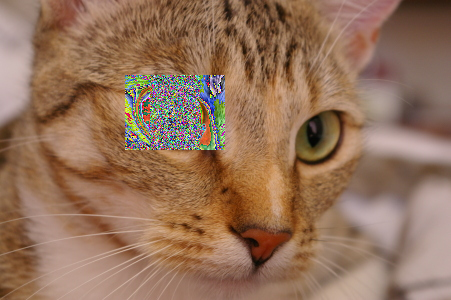

In [77]:
# Your code here
cat[75:150, 125:225, :]*=5
cat

**Exercise 6.3** Finally, let's flip the image upside down. Hint: use backwards indexing on the first two dimensions, e.g. `::-1`.

array([[[162, 138, 128],
        [161, 137, 127],
        [161, 137, 127],
        ...,
        [125,  86,  53],
        [127,  88,  57],
        [139, 103,  71]],

       [[167, 143, 133],
        [166, 142, 132],
        [166, 142, 132],
        ...,
        [134,  95,  64],
        [139, 103,  71],
        [128,  92,  60]],

       [[172, 145, 138],
        [172, 145, 138],
        [172, 145, 138],
        ...,
        [132,  98,  71],
        [105,  71,  43],
        [ 92,  58,  30]],

       ...,

       [[ 50,  30,  19],
        [ 49,  29,  18],
        [ 48,  28,  17],
        ...,
        [146, 122, 109],
        [147, 125, 111],
        [148, 126, 112]],

       [[ 47,  30,  14],
        [ 45,  29,  13],
        [ 46,  29,  13],
        ...,
        [143, 120, 104],
        [145, 122, 106],
        [146, 123, 107]],

       [[ 45,  27,  13],
        [ 45,  27,  13],
        [ 45,  27,  13],
        ...,
        [141, 118, 102],
        [143, 120, 104],
        [143, 120, 104]]], dtype=uint8)
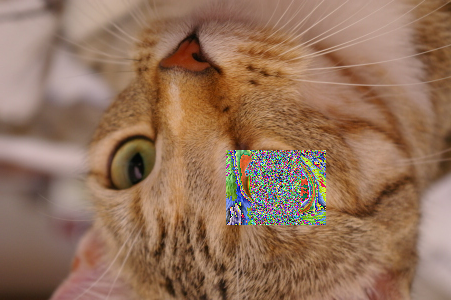

In [80]:
# Your code here
cat[::-1,::-1,:]